## 가입개월수
이전에 수행한 상관분석 결과, '이탈여부'는 '가입개월수'와 -0.4의 음의 상관관계를 보였다.  
시각화 결과에서도, 가입개월수가 증가할수록 이탈률이 감소하는 것을 볼 수 있었다.  
이는 '가입개월수'가 늘어날수록 이탈 가능성이 낮아진다는 것을 의미한다.  
따라서 가입개월수와 관련이 상관이 높은 변수를 찾아서, 이를 기반으로 맞춤형 프로모션을 진행한다면 이탈률을 낮출 수 있을 것으로 기대된다.

### 전체 변수들 중 분석해 볼 만한 가입개월수와 상관이 높은 변수 선정
- 계약기간유형 : 2년 > 1년 > 월 결제 순으로 가입개월수가 많을 것이다.
- 가입혜택, 부가서비스여부, 프리미엄기술지원여부 : 서비스/지원을 받고 있는 고객의 경우 서비스/지원에 만족했다면 가입개월수가 많을 것이다.
- 친구추천여부, 친구추천횟수 : 추천을 많이 했다면 본인 스스로도 오래 사용했을 것이므로, 가입개월수가 많을 것이다.
- 만족도 점수 : 만족도 점수가 높으면 가입개월수가 많을 것이다.

- 원래 데이터셋 상관분석 결과 가입개월수와 상관이 높은 변수
  : 배우자여부, 복수회선여부, 온라인보안서비스여부, 온라인백업서비스여부, 기기보호서비스여부, 기술지원서비스여부, TV스트리밍이용여부, 총요금
- 총요금에는 가입개월수가 계산되기 때문에 제하면 크게 배우자여부, 복수회선여부, 부가서비스여부로 볼 수 있다.
  각 변수들은 가입개월수와 모두 양의 상관관계를 가진다.
- 이는 배우자가 있을 때, 복수회선을 사용할 때, 부가서비스를 사용할 때 이탈 가능성이 높다는 것을 시사하기 때문에, 이러한 변수들에 맞춘 새로운 맞춤 프로모션을 적용하기에는 어렵다고 사료되어진다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
## 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
## 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df):
  print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
  summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
  summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

  summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
  summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산

  summary['첫 번째 값'] = df.iloc[0].values                          # 각 피처의 첫 번째 샘플 값
  summary['두 번째 값'] = df.iloc[1].values                          # 각 피처의 두 번째 샘플 값
  summary['세 번째 값'] = df.iloc[2].values                          # 각 피처의 세 번째 샘플 값

  return summary                                                     # 요약 테이블 반환

In [3]:
# 기존에 분석했던 것들 그대로 가져옴
tel = pd.read_csv('data/tel_data.csv', index_col=0)

In [4]:
categorical_df = tel.select_dtypes(include='object')
categorical_df.drop(columns = '고객ID', inplace = True)
categorical_df = pd.get_dummies(categorical_df)
categorical_df['이탈여부'] = tel['이탈여부']
categorical_df['가입개월수'] = tel['가입개월수']
categorical_df

,인터넷서비스유형_DSL,인터넷서비스유형_False,인터넷서비스유형_Fiber optic,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year,결제방법_Bank transfer (automatic),결제방법_Credit card (automatic),결제방법_Electronic check,결제방법_Mailed check,이탈여부,가입개월수
0,True,False,False,True,False,False,False,False,True,False,False,1
1,True,False,False,False,True,False,False,False,False,True,False,34
2,True,False,False,True,False,False,False,False,False,True,True,2
3,True,False,False,False,True,False,True,False,False,False,False,45
4,False,False,True,True,False,False,False,False,True,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,False,False,False,True,False,False,False,False,True,False,24
7039,False,False,True,False,True,False,False,True,False,False,False,72
7040,True,False,False,True,False,False,False,False,True,False,False,11
7041,False,False,True,True,False,False,False,False,False,True,True,4


In [5]:
correlation_matrix = categorical_df.corr()
print(correlation_matrix)

                                인터넷서비스유형_DSL  인터넷서비스유형_False  \
인터넷서비스유형_DSL                        1.000000       -0.380635   
인터넷서비스유형_False                     -0.380635        1.000000   
인터넷서비스유형_Fiber optic               -0.640987       -0.465793   
계약기간유형_Month-to-month              -0.065509       -0.218639   
계약기간유형_One year                     0.046795        0.038004   
계약기간유형_Two year                     0.031714        0.218278   
결제방법_Bank transfer (automatic)      0.025476       -0.002113   
결제방법_Credit card (automatic)        0.051438        0.001030   
결제방법_Electronic check              -0.104418       -0.284917   
결제방법_Mailed check                   0.041899        0.321361   
이탈여부                               -0.124214       -0.227890   
가입개월수                               0.013274       -0.039062   

                                인터넷서비스유형_Fiber optic  계약기간유형_Month-to-month  \
인터넷서비스유형_DSL                               -0.640987              -0.065509   
인터넷서비스유형_

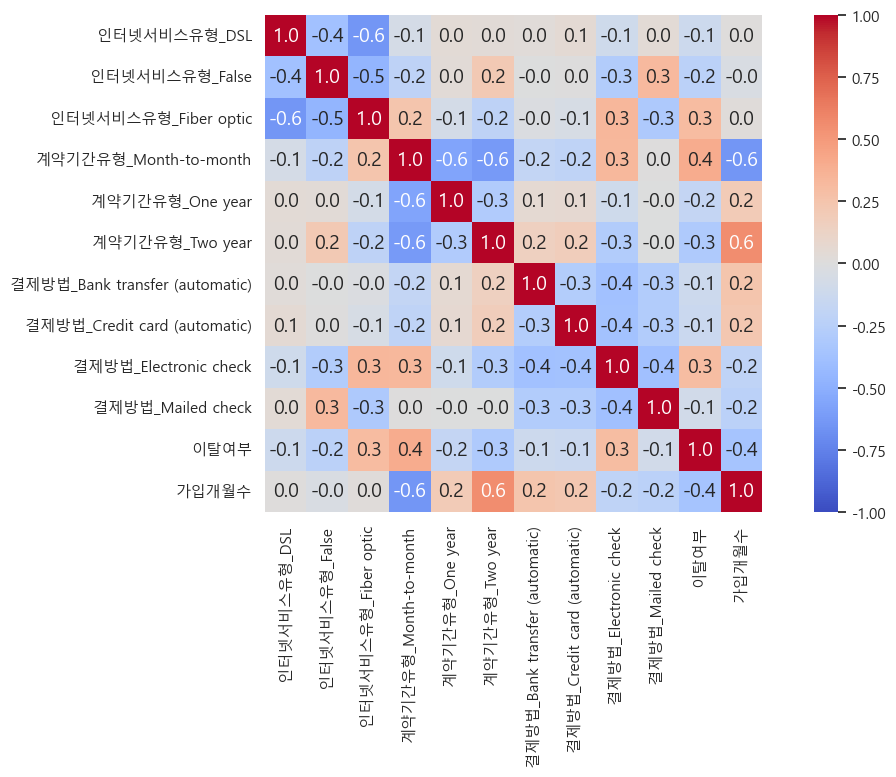

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- 계약기간유형_Month-to-month와 가입개월수는 -0.6,
- 계약기간유형_Two_year과 가입개월수는 0.6의 상관관계를 갖는 것으로 나타났다.

### 추가 데이터셋 변수와 가입개월수 비교

In [8]:
# 상현님이 작업한 demographics
demo = pd.read_csv('data/demographics_SH.csv')

In [9]:
demo

,고객ID,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수
0,8779-QRDMV,True,78,False,True,False,False,0
1,7495-OOKFY,False,74,False,True,True,True,1
2,1658-BYGOY,True,71,False,True,False,True,3
3,4598-XLKNJ,False,78,False,True,True,True,1
4,4846-WHAFZ,False,80,False,True,True,True,1
...,...,...,...,...,...,...,...,...
7038,2569-WGERO,False,30,False,False,False,False,0
7039,6840-RESVB,True,38,False,False,True,True,2
7040,2234-XADUH,False,30,False,False,True,True,2
7041,4801-JZAZL,False,32,False,False,True,True,2


In [10]:
# 민재님이 작업한 status
status = pd.read_csv('data/churn_status_preprocessing.csv')

In [11]:
status

,고객ID,분기,고객만족도점수,현재고객상태,이탈여부,이탈위험점수,고객생애가치,이탈유형,이탈사유
0,8779-QRDMV,Q3,3,Churned,True,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Q3,3,Churned,True,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Q3,2,Churned,True,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Q3,2,Churned,True,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Q3,2,Churned,True,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Q3,5,Stayed,False,45,5306,NaN,NaN
7039,6840-RESVB,Q3,3,Stayed,False,59,2140,NaN,NaN
7040,2234-XADUH,Q3,4,Stayed,False,71,5560,NaN,NaN
7041,4801-JZAZL,Q3,4,Stayed,False,59,2793,NaN,NaN


In [12]:
# 필요없는 컬럼 제거
status = status.drop(['분기','이탈위험점수','이탈유형','이탈사유'], axis=1)

In [13]:
# 추가 2개 병합
demo_stat = pd.merge(demo, status, on='고객ID', how='outer')

In [21]:
demo_stat

,고객ID,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수,고객만족도점수,현재고객상태,이탈여부,고객생애가치
0,0002-ORFBO,False,37,False,False,True,False,0,3,Stayed,False,2205
1,0003-MKNFE,True,46,False,False,False,False,0,5,Stayed,False,5414
2,0004-TLHLJ,True,50,False,False,False,False,0,1,Churned,True,4479
3,0011-IGKFF,True,78,False,True,True,False,0,1,Churned,True,3714
4,0013-EXCHZ,False,75,False,True,True,False,0,1,Churned,True,3464
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,False,20,True,False,False,False,0,4,Stayed,False,3161
7039,9992-RRAMN,True,40,False,False,True,False,0,1,Churned,True,5248
7040,9992-UJOEL,True,22,True,False,False,False,0,5,Joined,False,5870
7041,9993-LHIEB,True,21,True,False,True,False,0,3,Stayed,False,4792


In [22]:
# 가입개월수와 비교

# tel에서 '고객ID'와 '가입개월수'만 선택
tel_subset = tel[['고객ID', '가입개월수']]

# demo_stat에 병합
demo_stat = pd.merge(demo_stat, tel_subset, on='고객ID', how='left')

In [23]:
demo_stat

,고객ID,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수,고객만족도점수,현재고객상태,이탈여부,고객생애가치,가입개월수
0,0002-ORFBO,False,37,False,False,True,False,0,3,Stayed,False,2205,9
1,0003-MKNFE,True,46,False,False,False,False,0,5,Stayed,False,5414,9
2,0004-TLHLJ,True,50,False,False,False,False,0,1,Churned,True,4479,4
3,0011-IGKFF,True,78,False,True,True,False,0,1,Churned,True,3714,13
4,0013-EXCHZ,False,75,False,True,True,False,0,1,Churned,True,3464,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,False,20,True,False,False,False,0,4,Stayed,False,3161,13
7039,9992-RRAMN,True,40,False,False,True,False,0,1,Churned,True,5248,22
7040,9992-UJOEL,True,22,True,False,False,False,0,5,Joined,False,5870,2
7041,9993-LHIEB,True,21,True,False,True,False,0,3,Stayed,False,4792,67


In [25]:
numeric_df = demo_stat.select_dtypes(include=['number', 'bool'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               성별        나이   30세미만여부     고령자여부      결혼여부    부양가족여부     부양가족수  \
성별       1.000000  0.002186 -0.002962 -0.001874 -0.001808  0.005229  0.005840   
나이       0.002186  1.000000 -0.672651  0.681507 -0.003666 -0.125450 -0.119000   
30세미만여부 -0.002962 -0.672651  1.000000 -0.219216  0.015140  0.041651  0.036340   
고령자여부   -0.001874  0.681507 -0.219216  1.000000  0.016479 -0.174396 -0.168152   
결혼여부    -0.001808 -0.003666  0.015140  0.016479  1.000000  0.363430  0.324205   
부양가족여부   0.005229 -0.125450  0.041651 -0.174396  0.363430  1.000000  0.888234   
부양가족수    0.005840 -0.119000  0.036340 -0.168152  0.324205  0.888234  1.000000   
고객만족도점수 -0.003948 -0.085170  0.041993 -0.116601  0.077743  0.168359  0.152873   
이탈여부    -0.008612  0.115760 -0.054604  0.150889 -0.150448 -0.248542 -0.218780   
고객생애가치  -0.006851 -0.001826 -0.008363 -0.003167  0.137859  0.058222  0.049611   
가입개월수    0.005106  0.010202 -0.000579  0.016567  0.379697  0.131376  0.107689   

          고객만족도점수      이탈여부

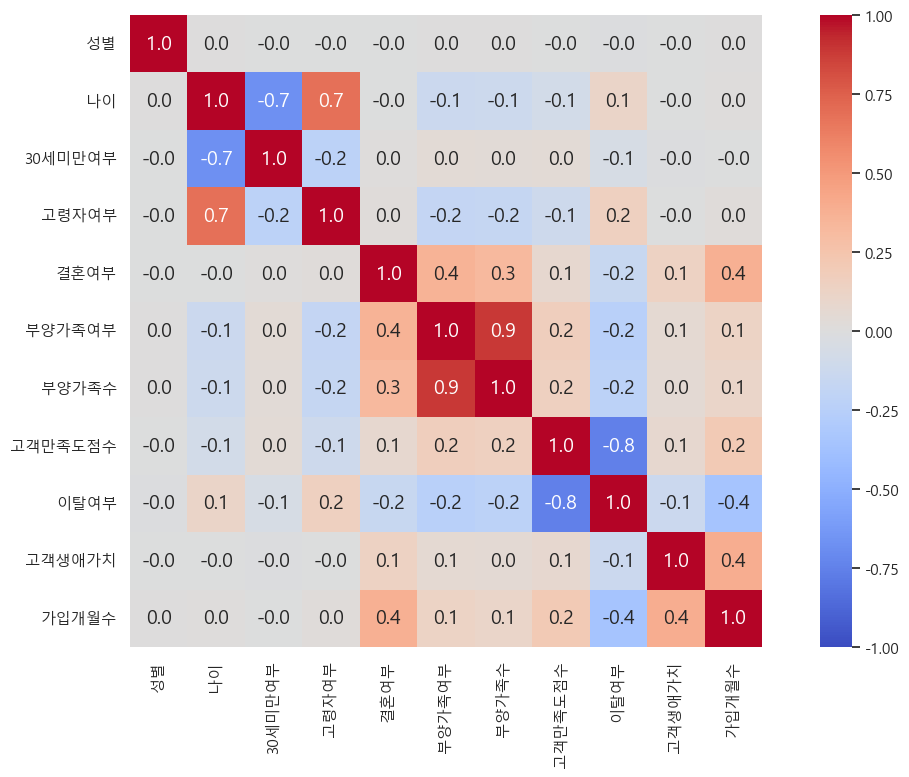

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- 결혼여부, 고객생애가치 이외에 특별한 연관성 보이지 않았다.
- 결혼여부는 이전 데이터셋에서 다루었고, 고객생애가치는 계산에 지속기간이 들어가므로 연관이 높을 수밖에 없다.
  

- **→ 따라서 이탈률과 음의 상관관계를 갖는 가입개월수를 늘리기 위해서는,**  
  **계약기간유형을 매달 결제 방식에서 2년 계약 방식으로 바꾸도록 유도해야 한다.**

가입혜택, 프리미엄기술지원여부, 친구추천여부, 횟수 모두 라희님 자료에 있는 것 같은데, 자료가 제대로 업로드되지 않은 듯
-> 이따 밤에 처리

---

# 계약기간유형

- 계약기간유형 변수는 Month-to-month, One year, Two year의 3개의 고유값을 가진 변수로, 각 유형이 원핫 인코딩하여 다른 변수들과 상관관계를 갖는지 알아보자.
- 계약기간유형_Month-to-month와 계약기간유형_Two Year는 각각 이탈여부와 각각 0.4, -0.3의 상관관계를 보이므로, 계약기간유형에서 Month-to-month 방식을 감소시키고, Two year 방식을 증가시킨다면 이탈 가능성이 줄어들 것이다.

In [41]:
contract = tel[['계약기간유형']]
contract = pd.get_dummies(contract)
contract

,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year
0,True,False,False
1,False,True,False
2,True,False,False
3,False,True,False
4,True,False,False
...,...,...,...
7038,False,True,False
7039,False,True,False
7040,True,False,False
7041,True,False,False


### 원래 데이터셋과의 비교

In [48]:
numeric_df = tel.select_dtypes(include=['number', 'bool'])

In [45]:
final_df = pd.concat([numeric_df, contract], axis=1)

In [49]:
correlation_matrix = final_df.corr()
correlation_matrix

,배우자여부,가입개월수,전화서비스가입여부,복수회선여부,온라인보안서비스여부,온라인백업서비스여부,기기보호서비스여부,기술지원서비스여부,TV스트리밍이용여부,영화스트리밍이용여부,전자청구서이용여부,월요금,총요금,인터넷서비스가입여부,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year
배우자여부,1.000000,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.317504,-0.000615,-0.280865,0.082783,0.248091
가입개월수,0.379697,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.826178,0.039062,-0.645561,0.202570,0.558533
전화서비스가입여부,0.017706,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113214,-0.172209,-0.000742,-0.002791,0.003519
복수회선여부,0.142057,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468504,0.210564,-0.088203,-0.003794,0.106253
온라인보안서비스여부,0.143106,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.411651,0.333403,-0.246679,0.100162,0.191773
온라인백업서비스여부,0.141498,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509226,0.381593,-0.164172,0.083722,0.111400
기기보호서비스여부,0.153786,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.521983,0.380754,-0.225662,0.102495,0.165096
기술지원서비스여부,0.119999,0.324221,-0.096340,0.100571,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.037880,0.338304,0.431883,0.336298,-0.285241,0.095775,0.240824
TV스트리밍이용여부,0.124666,0.279756,-0.022574,0.257152,0.176207,0.282106,0.390874,0.278070,1.000000,0.533094,0.223841,0.629603,0.514973,0.415552,-0.112282,0.061612,0.072049
영화스트리밍이용여부,0.117412,0.286111,-0.032959,0.258751,0.187398,0.274501,0.402111,0.279358,0.533094,1.000000,0.211716,0.627429,0.520122,0.418675,-0.116633,0.064926,0.073960


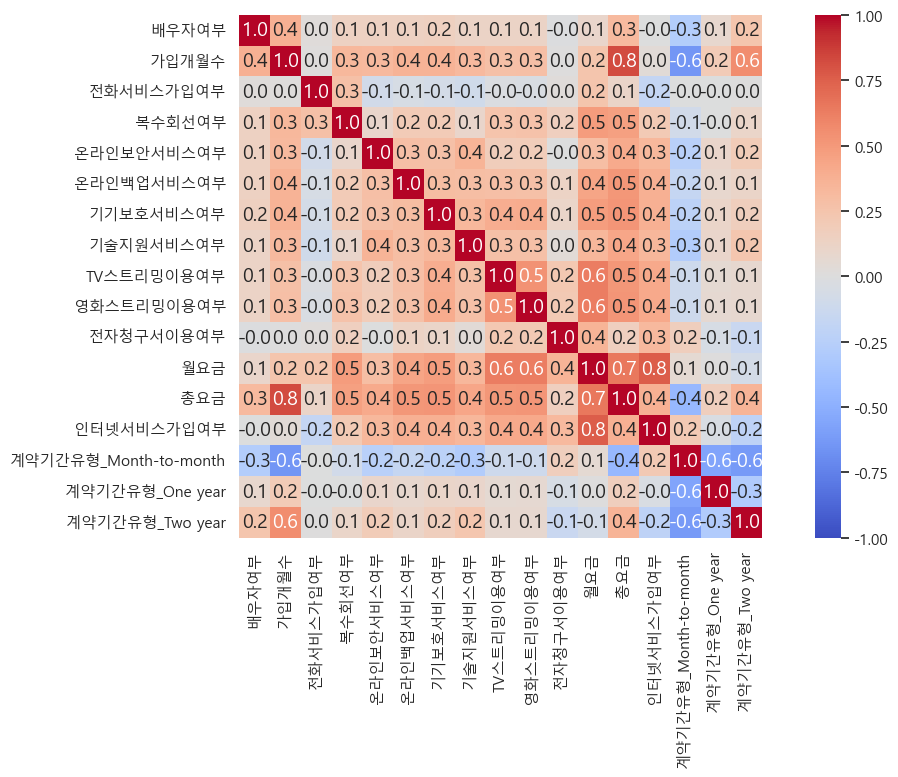

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- **정리**
- 배우자여부와 월결제계약 사이에는 -0.3의 음의 상관관계가 관찰되었다.
배우자가 있는 고객일수록 월결제방식을 덜 선택한다는 것을 알 수 있다.
- 기술지원서비스여부와 월결제계약 사이에는 -0.3의 음의 상관관계가 관찰되었다.
기술지원서비스를 이용하는 고객일수록 월결제방식을 덜 선택한다는 것을 알 수 있다.
- 가입개월수와 월결제는 -0.6의 음의 상관관계를, 가입개월수와 2년 계약은 0.6의 양의 상관관계를 보인다.
아까 봤던 것과 같이, 가입개월수가 길수록 이탈률은 적어진다는 것을 추측할 수 있다.
총요금 역시 계약기간이 길어질수록 총요금이 증가하는 것이 관찰되었으나, 프로모션에 필요한 방향이라고 생각되지는 않는다.

### 추가 데이터셋과의 비교

In [51]:
demo_stat

,고객ID,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수,고객만족도점수,현재고객상태,이탈여부,고객생애가치,가입개월수
0,0002-ORFBO,False,37,False,False,True,False,0,3,Stayed,False,2205,9
1,0003-MKNFE,True,46,False,False,False,False,0,5,Stayed,False,5414,9
2,0004-TLHLJ,True,50,False,False,False,False,0,1,Churned,True,4479,4
3,0011-IGKFF,True,78,False,True,True,False,0,1,Churned,True,3714,13
4,0013-EXCHZ,False,75,False,True,True,False,0,1,Churned,True,3464,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,False,20,True,False,False,False,0,4,Stayed,False,3161,13
7039,9992-RRAMN,True,40,False,False,True,False,0,1,Churned,True,5248,22
7040,9992-UJOEL,True,22,True,False,False,False,0,5,Joined,False,5870,2
7041,9993-LHIEB,True,21,True,False,True,False,0,3,Stayed,False,4792,67


In [54]:
numeric_df = demo_stat.select_dtypes(include=['number', 'bool'])

In [55]:
final_df2 = pd.concat([numeric_df, contract], axis=1)

In [57]:
correlation_matrix2 = final_df2.corr()
correlation_matrix2

,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수,고객만족도점수,이탈여부,고객생애가치,가입개월수,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year
성별,1.000000,0.002186,-0.002962,-0.001874,-0.001808,0.005229,0.005840,-0.003948,-0.008612,-0.006851,0.005106,-0.020511,0.016405,0.008262
나이,0.002186,1.000000,-0.672651,0.681507,-0.003666,-0.125450,-0.119000,-0.085170,0.115760,-0.001826,0.010202,0.000389,-0.022800,0.021238
30세미만여부,-0.002962,-0.672651,1.000000,-0.219216,0.015140,0.041651,0.036340,0.041993,-0.054604,-0.008363,-0.000579,0.001560,0.020106,-0.020943
고령자여부,-0.001874,0.681507,-0.219216,1.000000,0.016479,-0.174396,-0.168152,-0.116601,0.150889,-0.003167,0.016567,0.002076,-0.017847,0.014563
결혼여부,-0.001808,-0.003666,0.015140,0.016479,1.000000,0.363430,0.324205,0.077743,-0.150448,0.137859,0.379697,-0.012995,0.022701,-0.006474
부양가족여부,0.005229,-0.125450,0.041651,-0.174396,0.363430,1.000000,0.888234,0.168359,-0.248542,0.058222,0.131376,0.006662,0.006397,-0.013839
부양가족수,0.005840,-0.119000,0.036340,-0.168152,0.324205,0.888234,1.000000,0.152873,-0.218780,0.049611,0.107689,0.000539,0.012916,-0.012914
고객만족도점수,-0.003948,-0.085170,0.041993,-0.116601,0.077743,0.168359,0.152873,1.000000,-0.754649,0.075811,0.210056,-0.013558,0.015175,0.001342
이탈여부,-0.008612,0.115760,-0.054604,0.150889,-0.150448,-0.248542,-0.218780,-0.754649,1.000000,-0.127463,-0.352229,0.023072,-0.026006,-0.002108
고객생애가치,-0.006851,-0.001826,-0.008363,-0.003167,0.137859,0.058222,0.049611,0.075811,-0.127463,1.000000,0.396406,-0.002828,0.004012,-0.000526


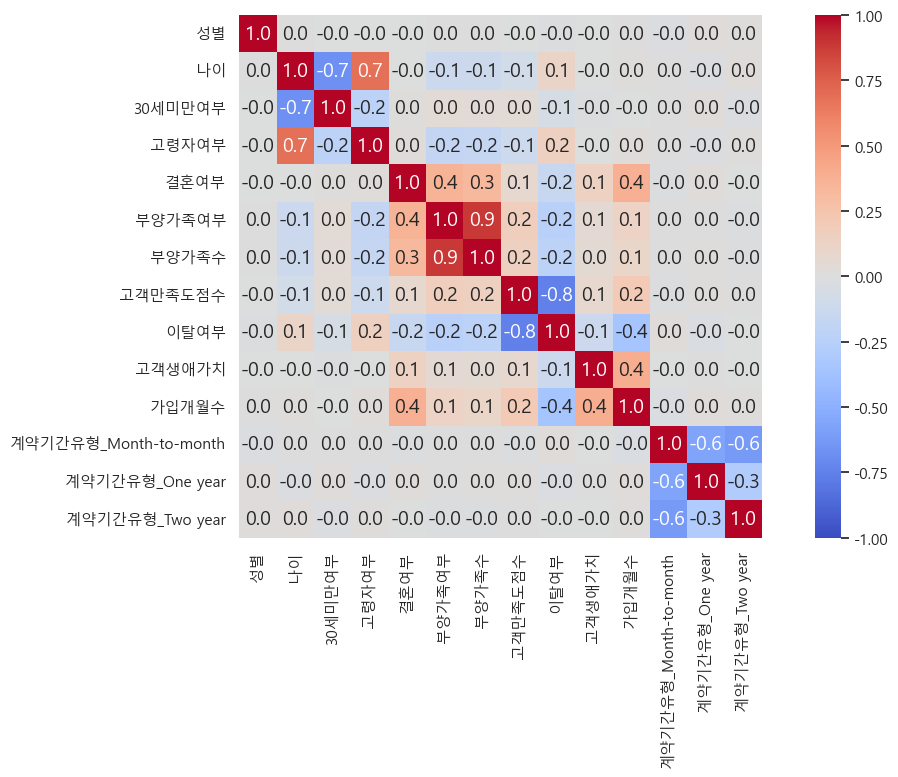

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- 추가된 데이터셋의 변수들과 계약기간유형은 큰 상관을 보이지 않는다.

### 정리

이탈여부와 상관관계를 갖는 변수는 가입개월수, 계약기간유형 등이 있으며,  
가입개월수의 경우 계약기간을 월결제방식에서 2년결제방식으로 전환하면 가입개월수가 늘어날 가능성이 커지는 것을 발견하였다.  
따라서 계약기간을 길게 잡았을 때 할인을 더 많이 해주는 프로모션을 도입하면 이탈 가능성을 낮추는 데 유의미한 효과를 볼 수 있을 것이다.